# Undercutting in a Model With Shoppers and Loyals

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import nashpy as n 

# user written 
import bimatrix

# for plotting purposes
cc = ['r','b','g'] # color order 
ll = ['--', '-.', ':'] # line style order 

# The Profit Function

Based on the market share function, 
$$
    s_i(p_i,p_j) = 
    \begin{cases}
        \frac{1}{4} & \text{if } p_i > p_j \\
        \frac{3}{4} & \text{if } p_i < p_j \\    
        \frac{1}{2} & \text{if } p_i = p_j. \\    
    \end{cases}
$$
Code up profits given by $\pi_i(p_i,p_j) = Ms_ip_i$


In [32]:
def s(pi, pj) -> float:
    '''Market share function
    ''' 
    if pi < pj: 
        return [] # FILL IN 
    elif pi > pj: 
        return [] # FILL IN 
    elif pi == pj: 
        return [] # FILL IN 
    else:
        raise Exception(f'Unexpected outcome: bad inputs? ')
        
def q(pi, pj, M=2.0) -> float: 
    '''quantity to firm i
    Inputs: 
        pi: price of firm i
        pj: price of competitor
        M: market size 
    Output: 
        qi: scalar quantity
    '''
    return M*s(pi,pj)

def profit(pi, pj) -> float:
    qi = q(pi, pj) # quantity to firm i 
    return pi*qi # profit to i 

### Plot profile of $\pi_1$ for $p_2 = 50$

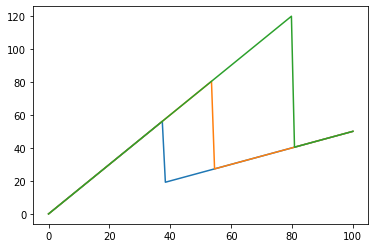

In [30]:
p2 = 50
G = 100 # number of grid points 
xx = np.linspace(0, 100, G)

for i,p2 in enumerate([38,54,80]):
    
    yy = np.empty((G,))
    for ig,p in enumerate(xx): 
        yy[ig] = profit(p, pj=p2)
        
    plt.plot(xx, yy);

In [5]:
pp = np.array([80, 54, 38])
G = pp.size # number of grid points (just 3)

# initialize the utility matrices we will be filling out 
U1 = np.empty((G,G)) 
U2 = np.empty((G,G))

for i1,p1 in enumerate(pp):
    for i2,p2 in enumerate(pp):
        U1[i1,i2] = [] # FILL IN 
        U2[i1,i2] = [] # FILL IN 

In [6]:
tab = bimatrix.print_payoffs(U1,U2)
tab.columns = [f'$p_2={p}$' for p in pp] # beautiful labels
tab.index   = [f'$p_1={p}$' for p in pp] # ... 
tab

,$p_2=80$,$p_2=54$,$p_2=38$
$p_1=80$,"(80.0, 80.0)","(40.0, 81.0)","(40.0, 57.0)"
$p_1=54$,"(81.0, 40.0)","(54.0, 54.0)","(27.0, 57.0)"
$p_1=38$,"(57.0, 40.0)","(57.0, 27.0)","(38.0, 38.0)"


In [7]:
g = n.Game(U1, U2)
g

Bi matrix game with payoff matrices:

Row player:
[[80. 40. 40.]
 [81. 54. 27.]
 [57. 57. 38.]]

Column player:
[[80. 81. 57.]
 [40. 54. 57.]
 [40. 27. 38.]]

In [9]:
eqs = list(g.lemke_howson_enumeration())
print(f'Found {len(eqs)} equilibria!')

Found 1 equilibria!


In [31]:
for eq in eqs: 
    print(eq)

(array([0.23169268, 0.36134454, 0.40696279]), array([0.23169268, 0.36134454, 0.40696279]))


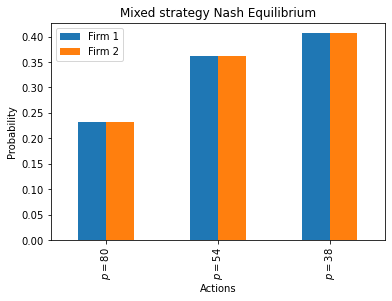

In [24]:
# you can make pretty graphs like these if you have the time and desire 